In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression

## Approche Statistique pour les modèles de Regression

### Partie 1

In [6]:
x=np.linspace(0,1,100)
y=2*np.sin(2*np.pi*x)


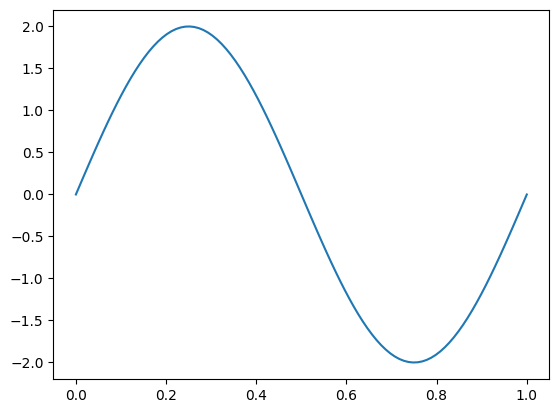

In [7]:
plt.plot(x,y)
plt.show()

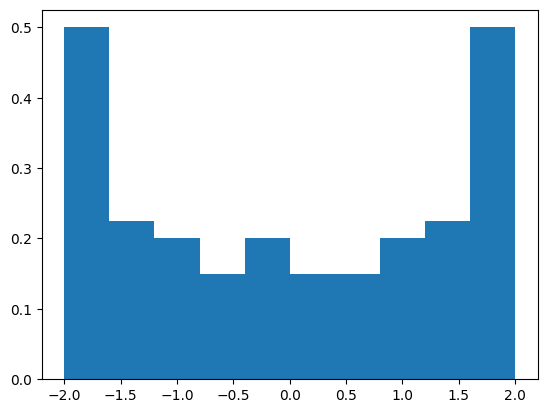

In [8]:
plt.hist(y,density=True)
plt.show()

In [13]:
mx= x.mean()
my= y.mean()

In [15]:
mx,my

(0.5, -6.15199614524724e-17)

In [17]:
len(x)+1

101

1.670715623835961e-31

In [25]:
#La variance
VarX = (1 / (len(x) + 1)) * np.sum((x - mx) ** 2)
VarX

0.0841750841750842

In [27]:
Sx=np.sqrt(VarX)
Sx

0.29012942659282975

In [31]:
VarY = (1 / (len(y) + 1)) * np.sum((y - my) ** 2)

VarY

1.9603960396039604

In [30]:
Sy=np.sqrt(VarY)
Sy

1.400141435571407

In [32]:
#La cov
Sxy=(1/(len(x)+1))*np.sum((x-mx)*(y-my))
Sxy

-0.31190198286104104

In [34]:
#y= ax+b
a= Sxy/(Sx**2)
b=my-(a*mx)

In [35]:
a,b

(-3.7053955563891665, 1.8526977781945833)

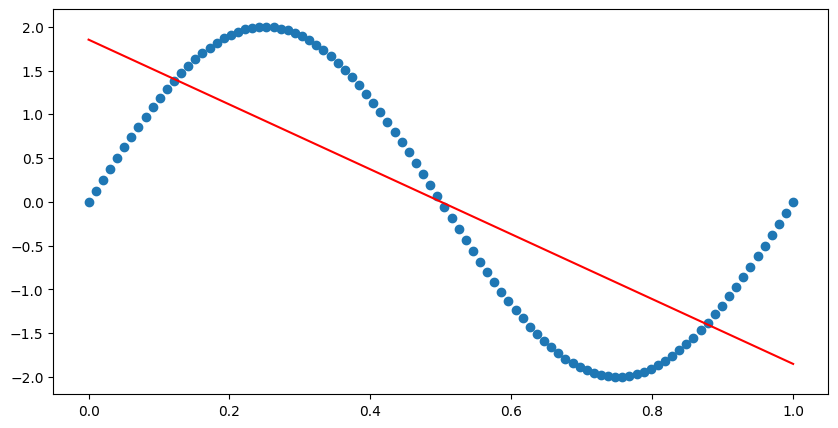

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x,a*x+b,c='r')
plt.show()

### Partie2

In [44]:
mon_fichier= '/content/drive/MyDrive/Labs_2025_IA/Lab0/quetelet.csv'
print('Chargement du fichier')
quetelet=np.genfromtxt(open(mon_fichier,'rb'),delimiter=',',names=True,dtype=None)
print('Fichier chargé')


Chargement du fichier
Fichier chargé


<ipython-input-44-cdb4d584a50c>:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  quetelet=np.genfromtxt(open(mon_fichier,'rb'),delimiter=',',names=True,dtype=None)


In [45]:
quetelet['poids']

array([60, 57, 51, 55, 50, 50, 48, 72, 52, 64, 53, 72, 61, 78, 68, 51, 53,
       79, 74, 62, 49, 50, 74, 80, 53, 73, 70, 72, 70, 62, 77, 70, 76, 51,
       52, 57, 53, 55, 66, 65, 75, 50, 53, 55, 55, 72, 75, 73, 71, 66, 71,
       79, 62, 47, 73, 72, 60, 67, 85, 73, 82, 86, 85, 65, 47, 74])

In [46]:
quetelet['taille']

array([1.7 , 1.69, 1.72, 1.74, 1.68, 1.61, 1.62, 1.89, 1.6 , 1.75, 1.65,
       1.64, 1.75, 1.84, 1.78, 1.58, 1.64, 1.79, 1.82, 1.74, 1.58, 1.63,
       1.72, 1.85, 1.7 , 1.78, 1.8 , 1.89, 1.72, 1.74, 2.  , 1.78, 1.78,
       1.68, 1.7 , 1.6 , 1.63, 1.68, 1.72, 1.75, 1.8 , 1.62, 1.77, 1.69,
       1.73, 1.82, 1.83, 1.84, 1.81, 1.8 , 1.78, 1.78, 1.68, 1.61, 1.71,
       1.8 , 1.74, 1.75, 1.82, 1.81, 1.88, 1.82, 1.89, 1.78, 1.5 , 1.86])

In [48]:
quetelet['sexe']

array([b'"h"', b'"f"', b'"f"', b'"f"', b'"f"', b'"f"', b'"f"', b'"h"',
       b'"f"', b'"h"', b'"f"', b'"h"', b'"h"', b'"h"', b'"h"', b'"f"',
       b'"f"', b'"h"', b'"h"', b'"h"', b'"f"', b'"f"', b'"h"', b'"h"',
       b'"f"', b'"h"', b'"h"', b'"h"', b'"f"', b'"f"', b'"h"', b'"h"',
       b'"h"', b'"f"', b'"f"', b'"f"', b'"f"', b'"f"', b'"f"', b'"h"',
       b'"h"', b'"f"', b'"f"', b'"h"', b'"h"', b'"h"', b'"h"', b'"h"',
       b'"h"', b'"h"', b'"h"', b'"h"', b'"h"', b'"f"', b'"h"', b'"h"',
       b'"h"', b'"h"', b'"h"', b'"h"', b'"h"', b'"h"', b'"h"', b'"h"',
       b'"f"', b'"h"'], dtype='|S3')

In [49]:
data= pd.read_csv('/content/drive/MyDrive/Labs_2025_IA/Lab0/quetelet.csv')
data.head()

,sexe,poids,taille
0,h,60,1.70
1,f,57,1.69
2,f,51,1.72
3,f,55,1.74
4,f,50,1.68


In [51]:
#La moyenne du poids et la taille
m_p=data['poids'].mean()
m_t=data['taille'].mean()
m_p,m_t

(64.51515151515152, 1.7406060606060605)

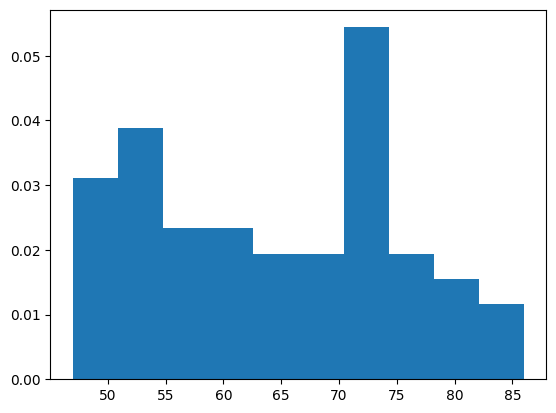

In [55]:
#La distribution du poids et de la taille
plt.hist(data['poids'],density=True)
plt.show()

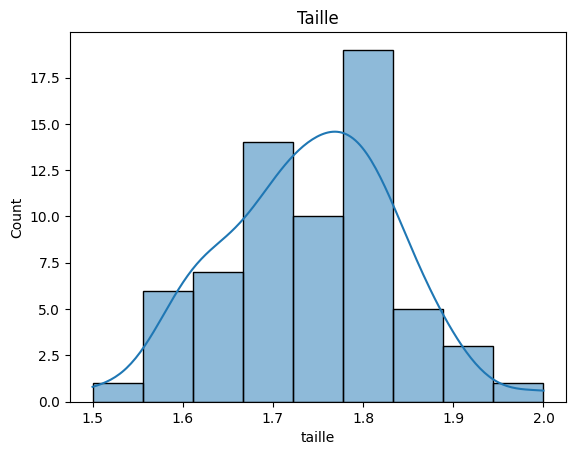

In [61]:
sns.histplot(data['taille'],kde=True)
plt.title('Taille')
plt.show()

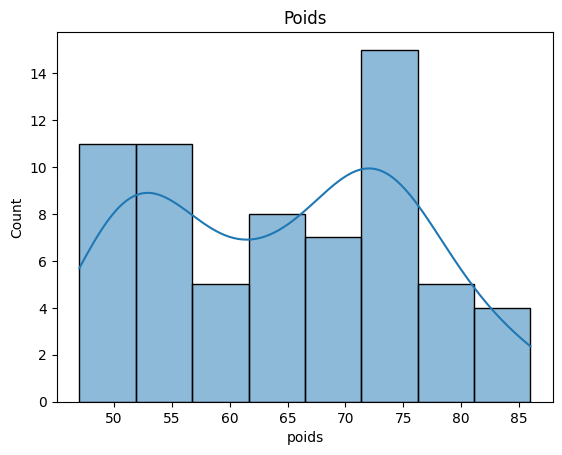

In [60]:
sns.histplot(data['poids'],kde=True)
plt.title('Poids')
plt.show()

In [140]:
data['sexe'].value_counts()



,count
sexe,
h,41
f,25


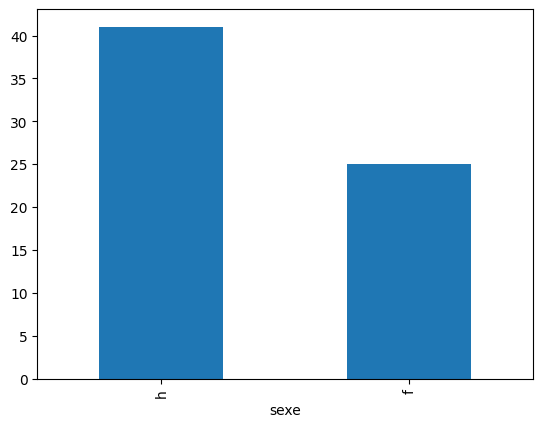

In [141]:
data['sexe'].value_counts().plot(kind='bar')
plt.show()

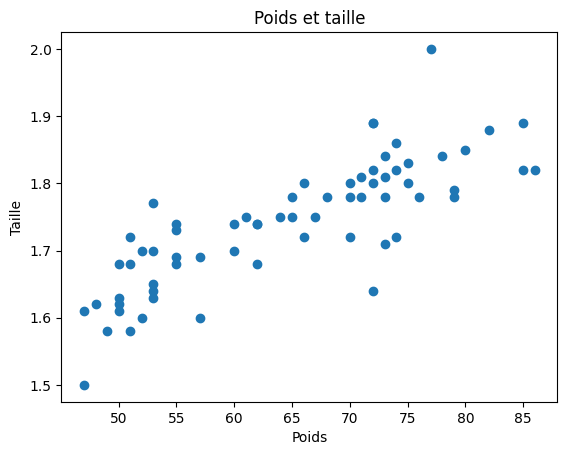

In [89]:
#Nuage de points poids et taille
plt.scatter(data['poids'],data['taille'])
plt.show()

In [90]:
#Les parametres de la regression: y=ax+b

VarT = (1 / (len(data['taille']) + 1)) * np.sum((data['taille'] - m_t) ** 2)
VarP = (1 / (len(data['poids']) + 1)) * np.sum((data['poids'] - m_p) ** 2)
S_t=np.sqrt(VarT)
S_p=np.sqrt(VarP)

#La cov
Sxy=(1/(len(data['poids'])+1))*np.sum((data['poids']-m_p)*(data['taille'] -m_t))
Syx=(1/(len(data['taille'])+1))*np.sum((data['taille']-m_t)*(data['poids'] -m_p))


In [91]:
print('La varaiance de la taille est: ',VarT)
print('La varaiance du poids est: ',VarP)
print('La cov est Sxy: ',Sxy)
print('La cov est Syx: ',Syx)

La varaiance de la taille est:  0.00841456354590683
La varaiance du poids est:  119.88783355947535
La cov est Sxy:  0.8158118498417005
La cov est Syx:  0.8158118498417005


In [92]:
#Estimation de la droite T=aP+b
a= Sxy/(S_p**2)
b=m_t-(a*m_p)

In [93]:
a2= Sxy/(S_t**2)
b2=m_p-(a2*m_t)

Text(0.5, 1.0, 'Poids et taille')

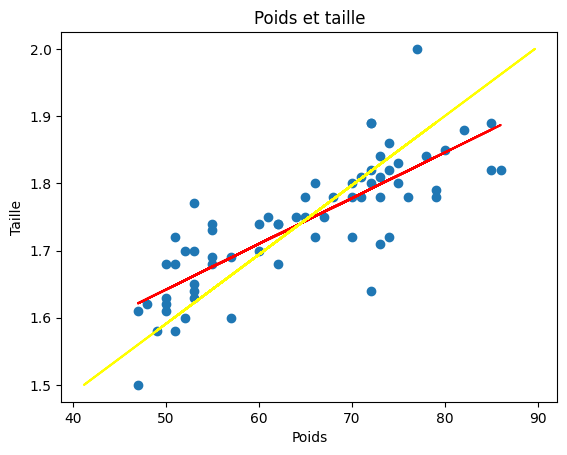

In [94]:
#La distribution ainsi que la droite
plt.scatter(data['poids'],data['taille'])
plt.plot(data['poids'],a*data['poids']+b,c='r')
plt.plot(a2*data['taille']+b2,data['taille'], c='yellow')
plt.xlabel('Poids')
plt.ylabel('Taille')
plt.title('Poids et taille')

### Partie3

In [76]:
data["taille__carre"]=data['taille']**2
data['imc']=data['poids']/data['taille__carre']
data.head()

,sexe,poids,taille,taille__carre,imc
0,h,60,1.70,2.8900,20.761246
1,f,57,1.69,2.8561,19.957284
2,f,51,1.72,2.9584,17.239048
3,f,55,1.74,3.0276,18.166204
4,f,50,1.68,2.8224,17.715420


In [84]:
data.describe()

,poids,taille,taille__carre,imc
count,66.000000,66.000000,66.000000,66.000000
mean,64.515152,1.740606,3.038252,21.156087
std,11.116505,0.093131,0.323992,2.266562
min,47.000000,1.500000,2.250000,16.917233
25%,53.000000,1.680000,2.822400,19.522287
50%,65.500000,1.745000,3.045050,20.893424
75%,73.000000,1.800000,3.240000,22.381634
max,86.000000,2.000000,4.000000,26.769780


Text(0.5, 1.0, 'Poids et taille au carré')

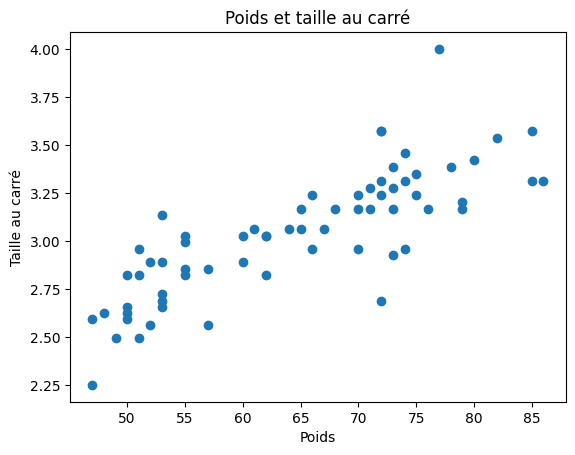

In [95]:
plt.scatter(data['poids'],data['taille__carre'])
plt.xlabel('Poids')
plt.ylabel('Taille au carré')
plt.title('Poids et taille au carré')


In [98]:
data.describe()

,poids,taille,taille__carre,imc
count,66.000000,66.000000,66.000000,66.000000
mean,64.515152,1.740606,3.038252,21.156087
std,11.116505,0.093131,0.323992,2.266562
min,47.000000,1.500000,2.250000,16.917233
25%,53.000000,1.680000,2.822400,19.522287
50%,65.500000,1.745000,3.045050,20.893424
75%,73.000000,1.800000,3.240000,22.381634
max,86.000000,2.000000,4.000000,26.769780


In [96]:
x=data['poids']
y=data['taille__carre']

In [97]:
m_x= x.mean()
m_y = y.mean()
m_x, m_y

(64.51515151515152, 3.038251515151515)

In [104]:
#Les variances
VarX = (1 / (len(x) + 1)) * np.sum((x - m_x) ** 2)
VarY = (1 / (len(y) + 1)) * np.sum((y - m_y) ** 2)
print('La variance de X est:',VarX)
print('La variance de Y est: ',VarY)

La variance de X est: 119.88783355947535
La variance de Y est:  0.10183710395296246


In [103]:
#les ecart types
Sx=np.sqrt(VarX)
Sy=np.sqrt(VarY)
print('L\'ecart type de X est:',Sx)
print('L\'ecart type de Y est: ',Sy)

L'ecart type de X est: 10.949330279038776
L'ecart type de Y est:  0.31911926289862613


In [106]:
#La covariance Sxy
Sxy=(1/(len(x)+1))*np.sum((x-m_x)*(y-m_y))
Sxy

2.8308723654454995

In [107]:
#Les parametres de la droite y=ax+b
a=Sxy/VarX
b=m_y-a*m_x
print("La pente de droite de regression est: ",a)
print('Le bias de la droite est: ',b)

La pente de droite de regression est:  0.02361267429226776
Le bias de la droite est:  1.5148762555079376


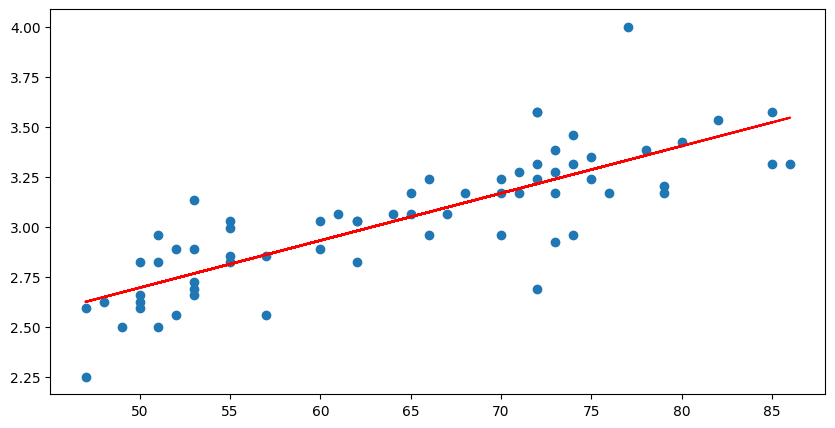

In [109]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x,a*x+b,c='r')
plt.show()

### Partie4: IMC
* Calculer la série statistique des IMC ;
* en donner moyenne, écart-type, médiane.
* Donner un graphique montrant la distribution de l'IMC sur la population.

-------------------------------------------------------------
##### IMC: Interprétation
* Moins de 16,5 dénutrition ou famine
* 16,5 à 18,5 maigreur
* 18,5 à 25 corpulence normale
* 25 à 30 surpoids
* 30 à 35 obésité modérée
* 35 à 40 obésité sévère
* Plus de 40 obésité morbide ou massive

In [110]:
data.head()

,sexe,poids,taille,taille__carre,imc
0,h,60,1.70,2.8900,20.761246
1,f,57,1.69,2.8561,19.957284
2,f,51,1.72,2.9584,17.239048
3,f,55,1.74,3.0276,18.166204
4,f,50,1.68,2.8224,17.715420


In [131]:
m_imc=data['imc'].mean()
print('La moyenne de l\'IMC est: ',m_imc)

La moyenne de l'IMC est:  21.156086517419343


In [133]:
VarY = (1 / (len(data['imc']) + 1)) * np.sum((data['imc'] - m_imc) ** 2)
print('La variance de l\'IMC est: ',VarY)

La variance de l'IMC est:  4.983950400194714


### Pour la distribution, nous allons regrouper les individus par Interpretation de IMC

* "DF"==>Denutrition ou Famine
* "M"===>Maigreur
* "CN"===> Corpulence Normale
* "SP"===>SurPoids
* "OM"===>Obésité Moderé
* "OS"===>Obésité Sévère
* "OM++"==>Obésité Morbide ou Massive


In [111]:
# Définition des intervalles et des labels
bins = [-float('inf'), 16.5, 18.5, 25, 30, 35, 40, float('inf')]
labels = [
    "DF",
    "M",
    "CN",
    "SP",
    "OM",
    "OS",
    "OM++"
]

data['Interprétation'] = pd.cut(data['imc'], bins=bins, labels=labels, right=False)

# Affichage du résultat
print(data)


   sexe  poids  taille  taille__carre        imc Interprétation
0     h     60    1.70         2.8900  20.761246             CN
1     f     57    1.69         2.8561  19.957284             CN
2     f     51    1.72         2.9584  17.239048              M
3     f     55    1.74         3.0276  18.166204              M
4     f     50    1.68         2.8224  17.715420              M
..  ...    ...     ...            ...        ...            ...
61    h     86    1.82         3.3124  25.963048             SP
62    h     85    1.89         3.5721  23.795526             CN
63    h     65    1.78         3.1684  20.515086             CN
64    f     47    1.50         2.2500  20.888889             CN
65    h     74    1.86         3.4596  21.389756             CN

[66 rows x 6 columns]


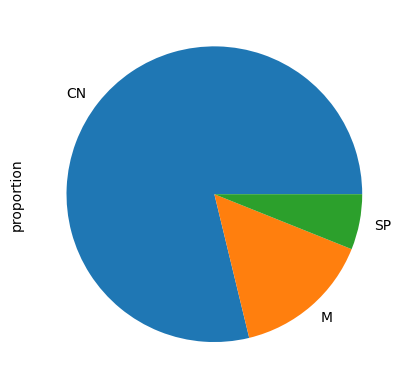

In [114]:
data['Interprétation'].value_counts(normalize=True).plot(kind='pie')
plt.show()

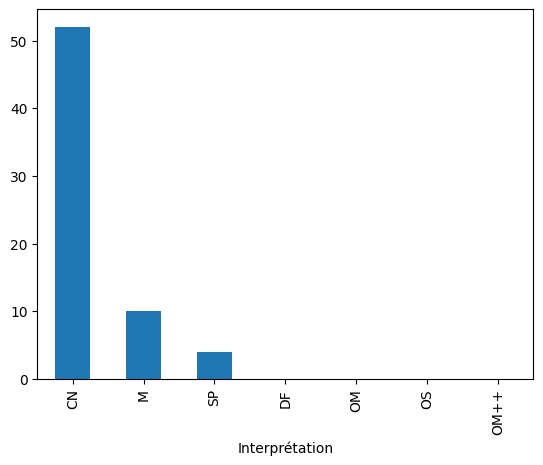

In [129]:
data['Interprétation'].value_counts().plot(kind='bar')
plt.show()


In [116]:
data['Interprétation'].value_counts(normalize=True)*100

,proportion
Interprétation,
CN,78.787879
M,15.151515
SP,6.060606
DF,0.000000
OM,0.000000
OS,0.000000
OM++,0.000000


### Interpretation

On voit que
* 78,78% de la popilation a une CN==> Corpulence Normale
* 15,15% ont une Maigreur,
* 6,06% ont un Sur Poids.
* Pour Les autres categorgies, il n'ya pas de traces.


In [120]:
data[(data['imc']>16.5) & (data['imc']<18.5)].shape

(10, 6)

### Partie5: Selection des données

In [134]:
#Selectionner dans le dataset, les individue dont le sexe est f
data.head()

,sexe,poids,taille,taille__carre,imc,Interprétation
0,h,60,1.70,2.8900,20.761246,CN
1,f,57,1.69,2.8561,19.957284,CN
2,f,51,1.72,2.9584,17.239048,M
3,f,55,1.74,3.0276,18.166204,M
4,f,50,1.68,2.8224,17.715420,M


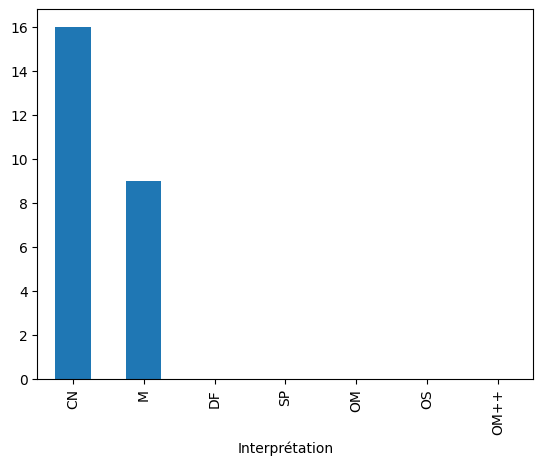

In [151]:
# for i in range (len(quetelet ["sexe"])) if quetelet ["sexe"][i]== "f" )
data_femmes = data[data['sexe'] == 'f']
data_femmes['Interprétation'].value_counts().plot(kind='bar')
plt.show()


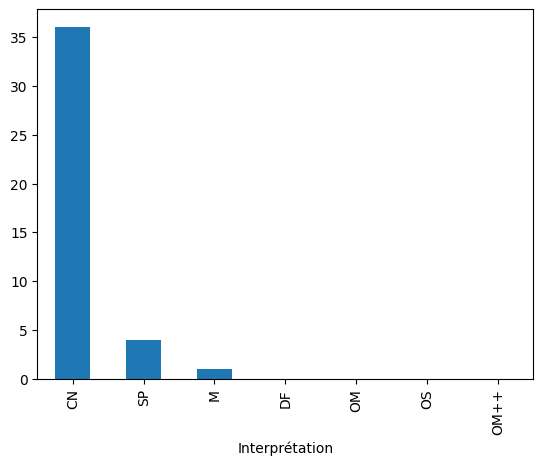

In [152]:
data_hoes = data[data['sexe'] == 'h']
data_hoes['Interprétation'].value_counts().plot(kind='bar')
plt.show()

In [148]:
# La litse des femmes avec les listes comprehensions
# Il s'agit juste des positions (indice) des femmes.
list_femmes= [i for i,sexe in enumerate(data['sexe']) if sexe=='f' ]

##  Approche Machine Learning avec le calcul des Gradients

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Labs_2025_IA/Lab0/quetelet.csv')
data.head()

,sexe,poids,taille
0,h,60,1.70
1,f,57,1.69
2,f,51,1.72
3,f,55,1.74
4,f,50,1.68


### Separation des données

In [122]:
X,y= make_regression(n_samples=100,n_features=1,noise=20)


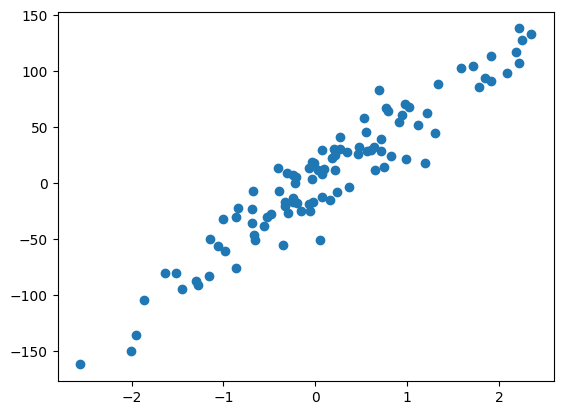

In [123]:
plt.scatter(X,y)
plt.show()

In [124]:
y= y.reshape((y.shape[0],1))

In [125]:
y.shape

(100, 1)

In [126]:



vecteur_identite = np.ones(len(X))

# Construction de la matrice X
X = np.column_stack((X, vecteur_identite))

X.shape

(100, 2)

In [127]:
np.random.seed(200)
theta= np.random.rand(2,1)
theta= theta.reshape((2,1))

In [128]:
theta

array([[0.94763226],
       [0.22654742]])

### Le modèle

In [129]:
def model(X,theta):
  return X.dot(theta)

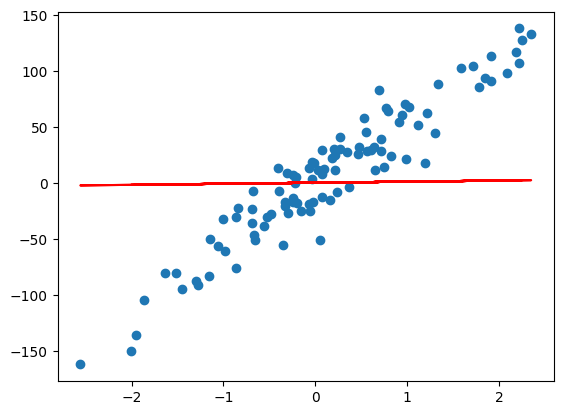

In [142]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],model(X,theta),c='r')
plt.show()

In [130]:
# La fonction cout

def cost_function(X,y,theta):
  m= len(y)
  return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [131]:
cost_function(X,y,theta)

1834.0531486677746

In [132]:
print("Shape de X:", X.shape)
print("Shape de theta:", theta.shape)
print("Shape de model(X,theta):", model(X, theta).shape)


Shape de X: (100, 2)
Shape de theta: (2, 1)
Shape de model(X,theta): (100, 1)


In [133]:
#Le gradient
def gradient(X,y,theta):
  m= len(y)
  return 1/m*X.T.dot(model(X,theta)-y)

In [134]:
grad= gradient(X,y,theta)
grad

array([[-60.11941603],
       [ -7.14361048]])

In [135]:
#Descente de gradient
def gradient_descente(X,y,theta,learning_rate,n_inter):
  cost_history= np.zeros(n_inter)
  for i in range(0,n_inter):
    theta= theta-learning_rate*gradient(X,y,theta)
    cost_history[i]= cost_function(X,y,theta)
  return theta,cost_history


In [146]:
final_theta= gradient_descente(X,y,theta,0.01,400)[0]
cost_history= gradient_descente(X,y,theta,0.01,400)[1]


In [141]:
final_theta


array([[56.28263076],
       [-0.73214018]])

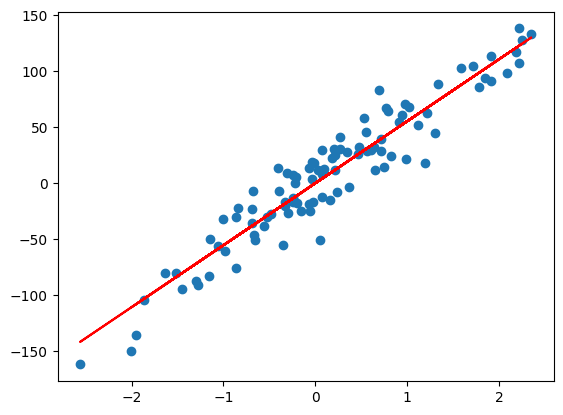

In [147]:
pred= model(X,final_theta)
plt.scatter(X[:,0],y)
plt.plot(X[:,0],pred,c='r')
plt.show()

### Learning curve
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

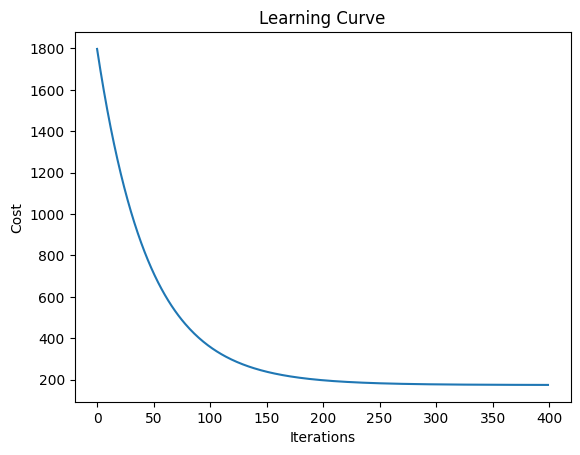

In [148]:
plt.plot(range(400), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.show()

In [149]:
# Evaluer le modele

def evaluation(y,y_pred):
  mse= np.mean((y-y_pred)**2)
  r_sqrt= 1- np.sum((y-y_pred)**2)/np.sum((y-y.mean())**2)
  mae= np.mean(np.abs(y-y_pred))
  return(
      {
          "MSE":mse,
          "R²":r_sqrt,
          "MAE":mae
      }
  )

In [150]:
evaluation(y,pred)

{'MSE': 349.0383562982486, 'R²': 0.9064238526367466, 'MAE': 15.132161119175903}